In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

The first dataset focuses on traffic volume (via AADT and VKM data) and vehicle types (motorcycles, cars, buses, etc.), with TOID used for location identification.

In [2]:
vkm_df = pd.read_excel("datasets/laei-2019-major-roads-vkm-flows-speeds.xlsx")

In [3]:
vkm_df.head()

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,...,50,3659,736,1451,531,2759,3659,-,327,231749
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,...,78,1718,344,687,258,1289,1718,-,1160,295268
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,...,57,1377,275,551,192,1042,1377,-,7746,158880
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,...,2066,63666,12679,25359,9172,48019,63396,-,97388,4851571
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,...,11,465,94,185,67,352,465,-,446,43270


In [4]:
vkm_df.shape

(79437, 48)

In [5]:
vkm_df.columns

Index(['Year', 'TOID', 'LAEI Zone', 'Borough', 'Road Classification',
       ' AADT Motorcycle ', ' AADT Taxi ', ' AADT Petrol Car ',
       ' AADT Diesel Car ', ' AADT Electric Car ', ' AADT Petrol PHV ',
       ' AADT Diesel PHV ', ' AADT Electric PHV ', ' AADT Petrol LGV ',
       ' AADT Diesel LGV ', ' AADT Electric LGV ',
       ' AADT 2019 - HGVs - Rigid - 2 Axles ',
       ' AADT 2019 - HGVs - Rigid - 3 Axles ',
       ' AADT 2019 - HGVs - Rigid - 4 or more Axles ',
       ' AADT 2019 - HGVs - Articulated - 3 to 4 Axles ',
       ' AADT 2019 - HGVs - Articulated - 5 Axles ',
       ' AADT 2019 - HGVs - Articulated - 6 Axles ', ' AADT 2019 - Buses ',
       ' AADT 2019 - Coaches ', ' AADT 2019 - Total ',
       ' Speed (km/hr) - Except Buses ', ' Speed (km/hr) - Buses Only ',
       ' Link Length (m) ', ' VKM Motorcycle ', ' VKM Taxi ',
       ' VKM Petrol Car ', ' VKM Diesel Car ', ' VKM Electric Car ',
       ' VKM Petrol PHV ', ' VKM Diesel PHV ', ' VKM Electric PHV ',
       

The second dataset includes emissions of key pollutants NOx, PM10, PM2.5 and CO2, and a range of additional pollutants (SO2, CH4, VOC...) in tonnes/year for 2013, 2016, 2019, 2025 and 2030 for each source category at a 1km grid square resolution.

In [6]:
emissions_df = pd.read_excel("datasets/LAEI-2019-Emissions-Summary-including-Forecast.xlsx", sheet_name="Emissions by Grid ID")

In [7]:
emissions_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


In [8]:
emissions_df.shape

(699120, 30)

In [9]:
emissions_df.columns

Index(['Year', 'Grid ID 2019', 'LAEI 1km2 ID', 'Easting', 'Northing',
       'Borough', 'Zone', 'Main Source Category', 'Sector', 'Source', 'bap',
       'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg', 'n2o',
       'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2',
       'Emissions Unit'],
      dtype='object')

In [10]:
# Filter the dataset to include only the rows where the 'Year' column is 2019

emissions2019_df = emissions_df[(emissions_df['Year'] == 2019)]
emissions2019_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
285264,2019,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021923,0.021923,NaN,tonnes/annum
285265,2019,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017965,0.017965,NaN,tonnes/annum
285266,2019,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022718,0.022718,NaN,tonnes/annum
285267,2019,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023939,0.023939,NaN,tonnes/annum
285268,2019,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022977,0.022977,NaN,tonnes/annum


In [11]:
emissions2019_df.shape

(143976, 30)

In [12]:
emissions2019_df[['Year', 'Grid ID 2019', 'LAEI 1km2 ID','Borough', 'Zone','Emissions Unit']].nunique()

Year                 1
Grid ID 2019      3460
LAEI 1km2 ID      2466
Borough             34
Zone                 4
Emissions Unit       1
dtype: int64

In [13]:
# Drop columns with a single unique value and those related to location
# Only Easting and Northing will be used for spatial analysis

emissions2019_df.drop(columns=['Year', 'Grid ID 2019', 'LAEI 1km2 ID','Borough', 'Zone','Emissions Unit'], inplace=True)

/var/folders/g6/knk2jdt132s0968_pqmjppfm0000gn/T/ipykernel_49583/541705911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions2019_df.drop(columns=['Year', 'Grid ID 2019', 'LAEI 1km2 ID','Borough', 'Zone','Emissions Unit'], inplace=True)


In [14]:
emissions2019_df.columns

Index(['Easting', 'Northing', 'Main Source Category', 'Sector', 'Source',
       'bap', 'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg',
       'n2o', 'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2'],
      dtype='object')

In [15]:
# Reshape the DataFrame by aggregating pollutant emissions data, ensuring each unique combination of location (Easting, Northing)
# and source (Main Source Category, Sector, Source) has a single row with aligned pollutant columns

main_columns = ['Easting', 'Northing','Main Source Category','Sector','Source']

pollutant_columns = ['bap', 'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg', 'n2o',
                     'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2']

emissions2019_df = emissions2019_df.groupby(main_columns, as_index=False).agg(
    {col: 'first' for col in pollutant_columns}
)

emissions2019_df.head()

,Easting,Northing,Main Source Category,Sector,Source,bap,cd,c4h6,c6h6,ch4,...,hg,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2
0,501500,167500,Domestic,Biomass,Wood Burning,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017743,0.017743,NaN
1,501500,167500,Domestic,Heat and Power Generation,Gas Combustion,NaN,NaN,NaN,0.001483,0.030168,...,NaN,0.000603,NaN,0.016482,0.09024,NaN,NaN,0.007240,0.007240,NaN
2,501500,167500,Domestic,Heat and Power Generation,Oil/Coal Combustion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
3,501500,167500,Domestic,Machinery,Household and Garden NRMM,2.092833e-07,6.928983e-10,0.000575,0.002742,0.001567,...,3.117615e-08,0.000148,0.000016,0.040752,0.02592,1.278754e-07,NaN,0.000660,0.000660,0.000045
4,501500,167500,Industrial and Commercial,Commercial Cooking,Commercial Cooking,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033792,0.033792,NaN


In [16]:
emissions2019_df.shape

(103516, 24)

In [17]:
emissions2019_df.duplicated(subset=main_columns).sum()

0

In [18]:
# Calculates the percentage of missing values for each pollutant column

pollutant_missing_percentage = emissions2019_df[pollutant_columns].isna().sum() / emissions2019_df.shape[0] * 100
pollutant_missing_percentage

bap      78.559836
cd       88.088798
c4h6     76.177596
c6h6     69.030874
ch4      64.266394
co       64.266394
co2      21.440164
hc       95.235519
hcl      92.853279
hg       85.706557
n2o      76.177596
nh3      78.559836
nmvoc    61.884153
nox      14.293443
pb       85.706557
pcb      83.324317
pm10      2.382240
pm2.5     2.382240
so2      76.177596
dtype: float64

Certain pollutants, such as PM10, PM2.5, and NOx, have very few missing values, making them highly reliable for further analysis. In contrast, others, like HC, HCl, and Hg, exhibit significant levels of missing data, suggesting limited usability without imputation or exclusion.

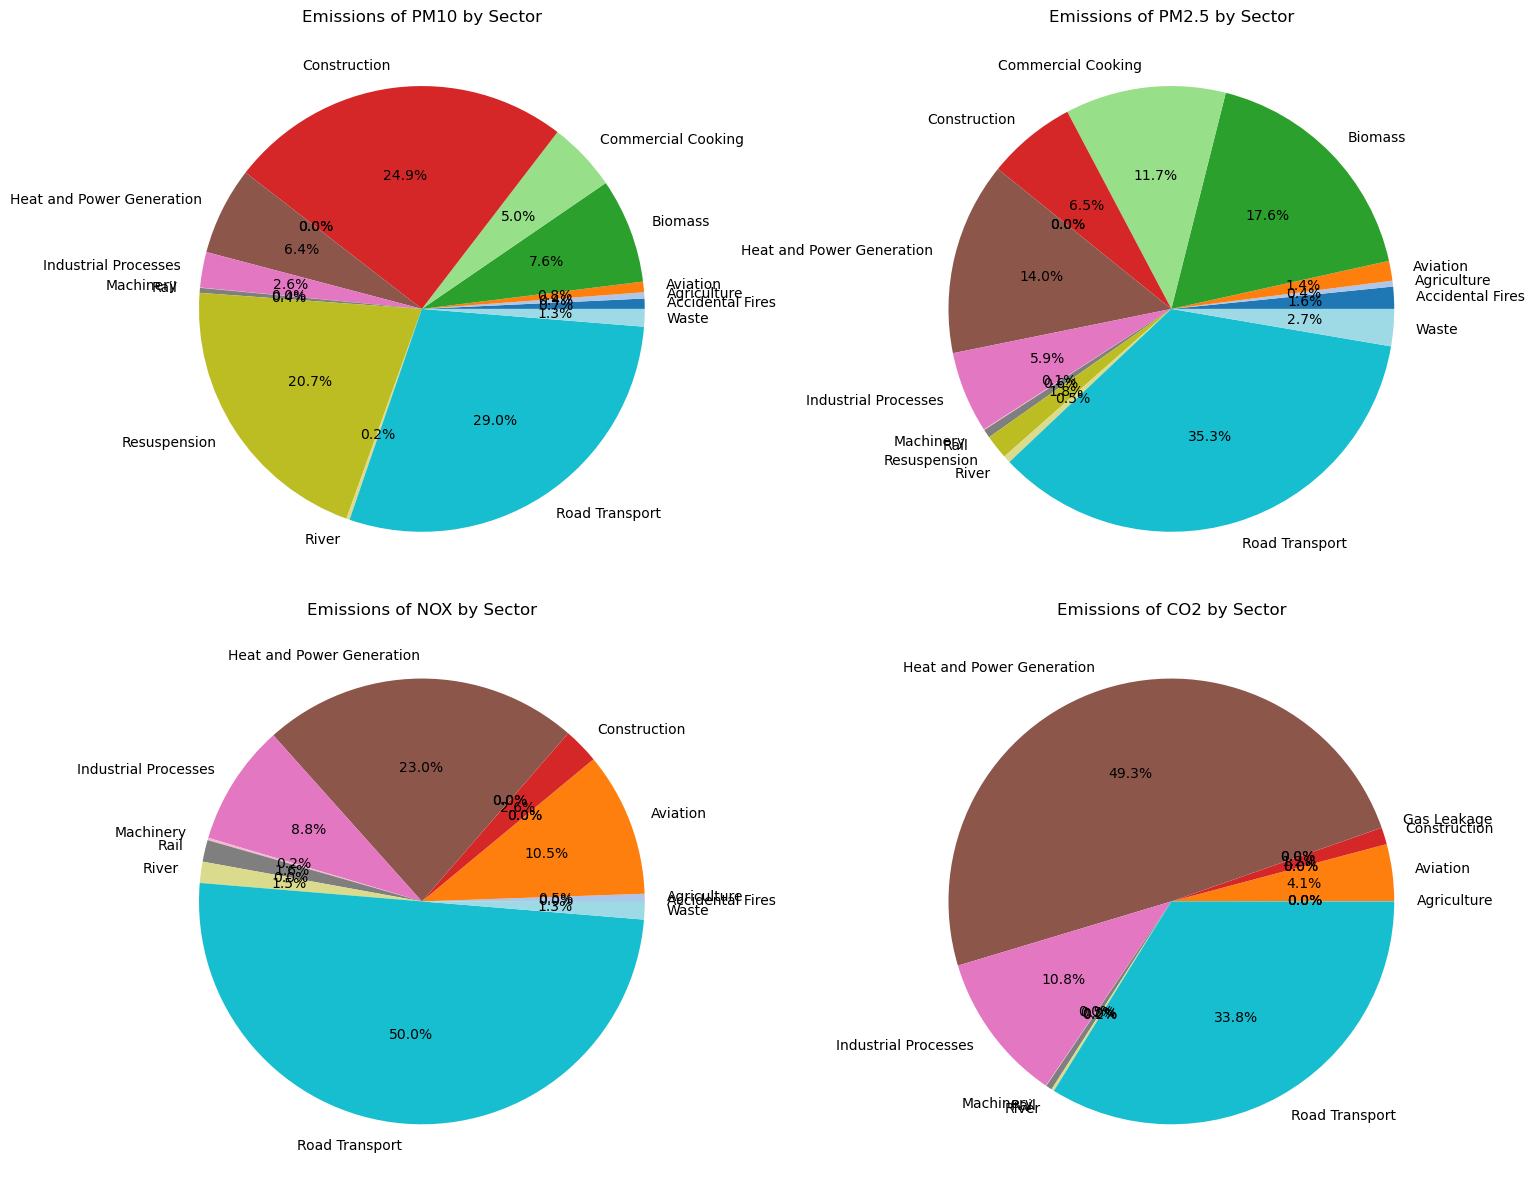

In [70]:
# Distribution of emissions for four pollutants (PM10, PM2.5, NOx, and CO2)
# across different sectors, focusing on those with less than 50% missing data

grouped_by_sector = emissions2019_df.groupby('Sector')[["pm10","pm2.5","nox","co2"]].sum()

pollutants = ['pm10', 'pm2.5', 'nox', 'co2']


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, pollutant in enumerate(pollutants):
    ax = axes[i // 2, i % 2] 
    grouped_by_sector[pollutant].plot(
        kind='pie',
        autopct='%1.1f%%', 
        ax=ax, 
        colormap='tab20', 
        legend=False
    )
    ax.set_ylabel('')  
    ax.set_title(f'Emissions of {pollutant.upper()} by Sector')

plt.tight_layout()
plt.show()

While Road Transport and Heat and Power Generation emerge as the most significant contributors to emissions, it is crucial to note that no single sector exceeds 50% in any category. This indicates a more distributed emission landscape, with multiple sectors contributing in meaningful but varying degrees across pollutants.

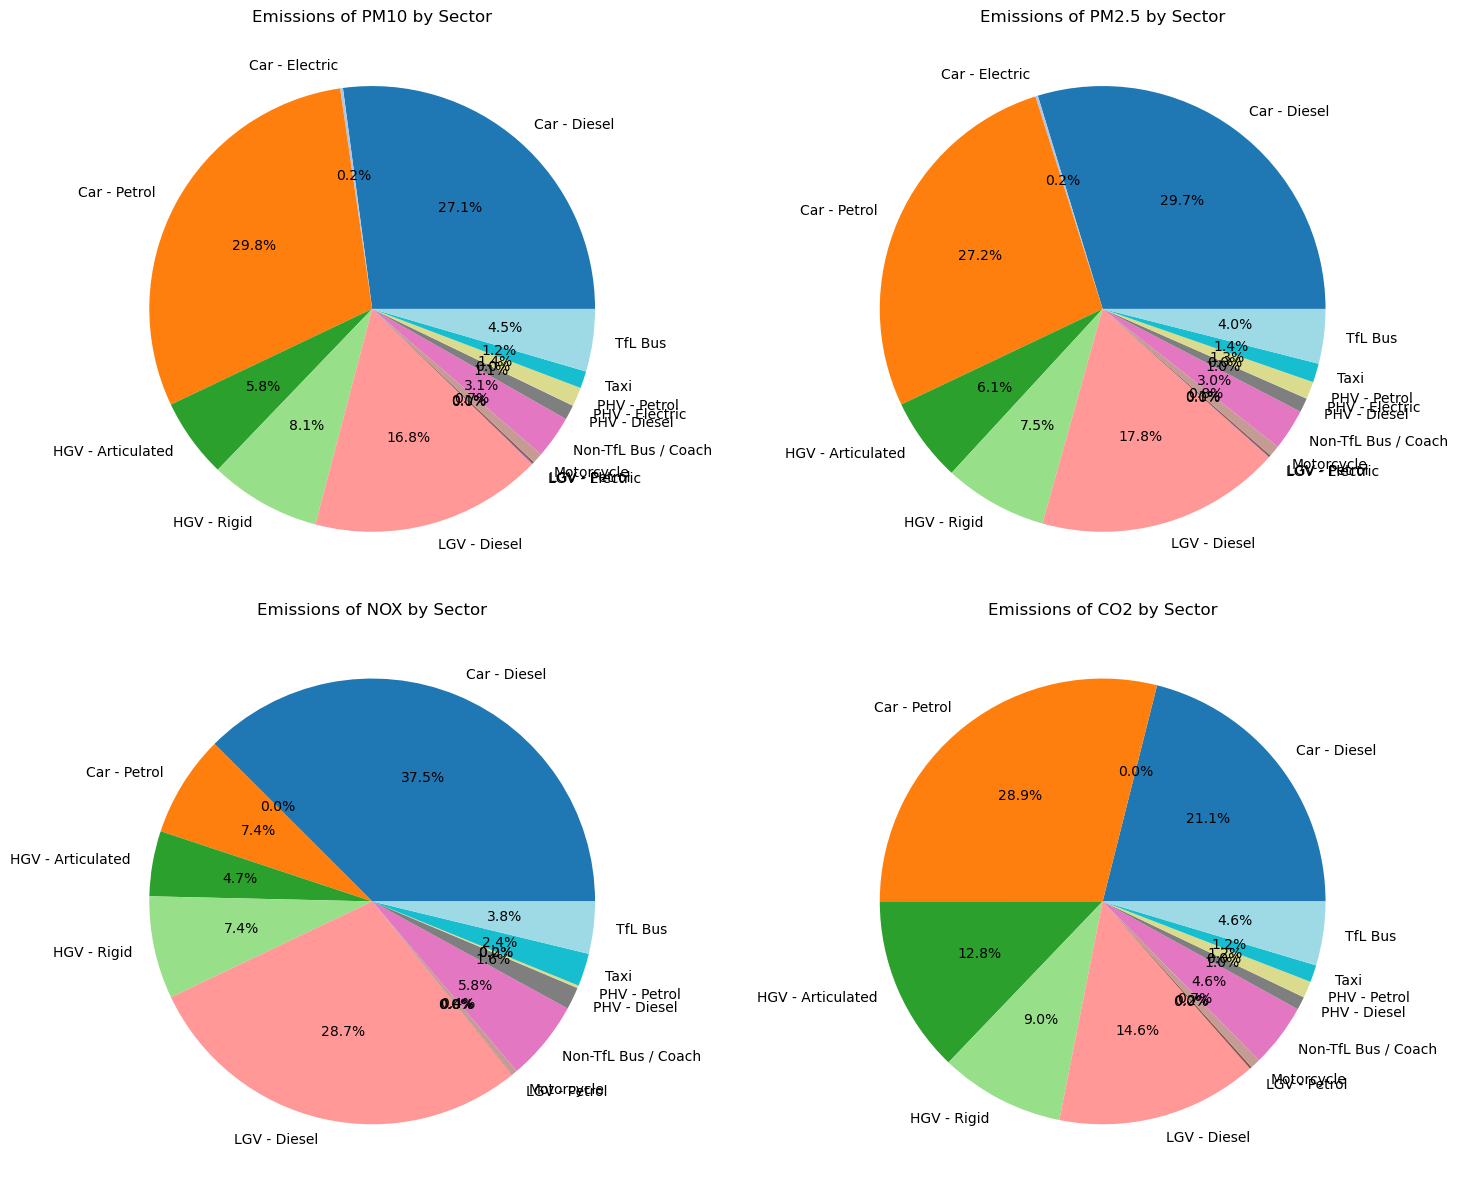

In [20]:
# Distribution of emissions for PM10, PM2.5, NOx, and CO2 across different sources within the road transport sector

road_transport_data = emissions2019_df[emissions2019_df['Sector'] == 'Road Transport']

grouped_by_road_transport_source = road_transport_data.groupby('Source')[["pm10","pm2.5","nox","co2"]].sum()
pollutants = ['pm10', 'pm2.5', 'nox', 'co2']


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, pollutant in enumerate(pollutants):
    ax = axes[i // 2, i % 2] 
    grouped_by_road_transport_source[pollutant].plot(
        kind='pie',
        autopct='%1.1f%%', 
        ax=ax, 
        colormap='tab20', 
        legend=False
    )
    ax.set_ylabel('')  
    ax.set_title(f'Emissions of {pollutant.upper()} by Sector')

plt.tight_layout()
plt.show()

Diesel vehicles, including both personal and commercial types, are the primary contributors to air pollution across all emission categories. In contrast, electric vehicles have a negligible impact on emissions. Commercial vehicles, such as HGVs and LGVs, also play a significant role in emissions, while public transport modes like TfL buses and taxis generally contribute less to air pollution. 

In [21]:
road_transport_data["Source"].unique()

array(['Car - Diesel', 'Car - Electric', 'Car - Petrol',
       'HGV - Articulated', 'HGV - Rigid', 'LGV - Diesel',
       'LGV - Electric', 'LGV - Petrol', 'Motorcycle',
       'Non-TfL Bus / Coach', 'PHV - Diesel', 'PHV - Electric',
       'PHV - Petrol', 'Taxi', 'TfL Bus'], dtype=object)

The four pollutants with less than 50% missing data will be retained because they provide sufficient data coverage for analysis, allowing for more reliable insights. Keeping these pollutants ensures that the analysis remains robust while minimizing the potential bias introduced by excessive missing data.

In [22]:
emissions2019_4pol_df = emissions2019_df[['Easting', 'Northing', 'Main Source Category', 'Sector', 'Source', 'co2', 'nox',  'pm10', 'pm2.5']]
emissions2019_4pol_df.head()

,Easting,Northing,Main Source Category,Sector,Source,co2,nox,pm10,pm2.5
0,501500,167500,Domestic,Biomass,Wood Burning,NaN,NaN,0.017743,0.017743
1,501500,167500,Domestic,Heat and Power Generation,Gas Combustion,341.073165,0.09024,0.007240,0.007240
2,501500,167500,Domestic,Heat and Power Generation,Oil/Coal Combustion,0.000000,0.00000,0.000000,0.000000
3,501500,167500,Domestic,Machinery,Household and Garden NRMM,3.177188,0.02592,0.000660,0.000660
4,501500,167500,Industrial and Commercial,Commercial Cooking,Commercial Cooking,NaN,NaN,0.033792,0.033792


The third dataset focuses on road transport emissions of NOx, PM10, PM2.5, and CO2, for 2019, 2025, and 2030. It includes data by vehicle type and specific PM emissions (exhaust, brake wear, and tire wear).

In [23]:
# PM10 emissions dataset

emissionsroads_PM10_df = pd.read_excel("datasets/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx", sheet_name="PM10 Road Link Emissions")

In [24]:
emissionsroads_PM10_df.shape

(238317, 52)

In [25]:
emissionsroads_PM10_df.head()

,TOID,pollutant,pm-source,emissions-units,Road-Car-Petrol-2019,Road-Car-Petrol-2025,Road-Car-Petrol-2030,Road-Car-Diesel-2019,Road-Car-Diesel-2025,Road-Car-Diesel-2030,...,Road-Non-TfL-Bus-or-Coach-2030,Road-Taxi-2019,Road-Taxi-2025,Road-Taxi-2030,Road-Motorcycle-2019,Road-Motorcycle-2025,Road-Motorcycle-2030,Road-Total-2019,Road-Total-2025,Road-Total-2030
0,osgb4000000027865913,pm10,exhaust,tonnes/year,0.027772,0.026916,0.021559,0.119410,0.023310,0.006968,...,0.000940,0.000467,0.000058,0.000052,0.002146,0.001608,0.001419,0.273490,0.074153,0.042511
1,osgb4000000027865914,pm10,exhaust,tonnes/year,0.027955,0.028748,0.023069,0.119109,0.024336,0.007216,...,0.001115,0.000786,0.000099,0.000083,0.002184,0.001752,0.001540,0.314744,0.083489,0.047803
2,osgb4000000027865915,pm10,exhaust,tonnes/year,0.025853,0.029750,0.033082,0.107461,0.032148,0.018957,...,0.000679,0.000975,0.000083,0.000073,0.001652,0.001315,0.001357,0.320484,0.137564,0.099260
3,osgb4000000027865916,pm10,exhaust,tonnes/year,0.030315,0.037069,0.041507,0.121762,0.034694,0.020029,...,0.000540,0.000818,0.000078,0.000062,0.001762,0.001393,0.001447,0.361042,0.152194,0.108697
4,osgb4000000027865917,pm10,exhaust,tonnes/year,0.017942,0.021212,0.023505,0.072647,0.020763,0.011928,...,0.000471,0.000900,0.000076,0.000065,0.001078,0.000852,0.000877,0.223138,0.092968,0.065531


In [26]:
emissionsroads_PM10_df.shape

(238317, 52)

In [27]:
emissionsroads_PM10_df.columns

Index(['TOID', 'pollutant', 'pm-source', 'emissions-units',
       'Road-Car-Petrol-2019', 'Road-Car-Petrol-2025', 'Road-Car-Petrol-2030',
       'Road-Car-Diesel-2019', 'Road-Car-Diesel-2025', 'Road-Car-Diesel-2030',
       'Road-Car-Electric-2019', 'Road-Car-Electric-2025',
       'Road-Car-Electric-2030', 'Road-PHV-Petrol-2019',
       'Road-PHV-Petrol-2025', 'Road-PHV-Petrol-2030', 'Road-PHV-Diesel-2019',
       'Road-PHV-Diesel-2025', 'Road-PHV-Diesel-2030',
       'Road-PHV-Electric-2019', 'Road-PHV-Electric-2025',
       'Road-PHV-Electric-2030', 'Road-LGV-Petrol-2019',
       'Road-LGV-Petrol-2025', 'Road-LGV-Petrol-2030', 'Road-LGV-Diesel-2019',
       'Road-LGV-Diesel-2025', 'Road-LGV-Diesel-2030',
       'Road-LGV-Electric-2019', 'Road-LGV-Electric-2025',
       'Road-LGV-Electric-2030', 'Road-HGV-Rigid-2019', 'Road-HGV-Rigid-2025',
       'Road-HGV-Rigid-2030', 'Road-HGV-Articulated-2019',
       'Road-HGV-Articulated-2025', 'Road-HGV-Articulated-2030',
       'Road-TfL-Bus

This dataset cover the same vehicle types (such as "Car - Petrol," "HGV - Articulated," etc.) as the one before, but offers additional granularity by splitting PM emissions into specific categories, including exhaust, brake wear, and tyre wear.

Finally, the last four datasets includes ground level concentrations of annual mean NOx, NO2, PM10 and PM2.5 in µg/m3.

In [28]:
concentrations_PM10_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_PM10m.csv")

In [29]:
concentrations_PM10_df.head()

,x,y,conc
0,519100,203440,15.09522
1,519120,203440,15.51029
2,519140,203440,16.40831
3,519160,203440,15.87096
4,519180,203440,15.34885


In [30]:
concentrations_PM10_df.shape

(5851964, 3)

In [31]:
concentrations_PM10_df.columns

Index(['x', 'y', 'conc'], dtype='object')

In [32]:
concentrations_NO2_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_NO2.csv")
concentrations_NOx_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_NOx.csv")
concentrations_PM25_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_PM25.csv")

In [33]:
concentrations_NO2_df.rename(columns={'conc': 'conc_NO2'}, inplace=True)
concentrations_PM10_df.rename(columns={'conc': 'conc_PM10'}, inplace=True)
concentrations_NOx_df.rename(columns={'conc': 'conc_NOx'}, inplace=True)
concentrations_PM25_df.rename(columns={'conc': 'conc_PM25'}, inplace=True)
concentrations_PM25_df.head()

,x,y,conc_PM25
0,519100,203440,9.567125
1,519120,203440,9.687501
2,519140,203440,9.953107
3,519160,203440,9.791943
4,519180,203440,9.635820


In [34]:
# Merge the four concentration datasets (PM10, NO2, NOx, and PM2.5) into a single DataFrame
# using the common spatial coordinates ('x' and 'y') to align data for each location

concentrations_df = concentrations_PM10_df.merge(concentrations_NO2_df, on=['x', 'y'], how='inner')
concentrations_df = concentrations_df.merge(concentrations_NOx_df, on=['x', 'y'], how='inner')
concentrations_df = concentrations_df.merge(concentrations_PM25_df, on=['x', 'y'], how='inner')
concentrations_df.head()

,x,y,conc_PM10,conc_NO2,conc_NOx,conc_PM25
0,519100,203440,15.09522,23.50290,37.54391,9.567125
1,519120,203440,15.51029,24.58045,40.60276,9.687501
2,519140,203440,16.40831,26.86432,47.19806,9.953107
3,519160,203440,15.87096,25.52398,43.32369,9.791943
4,519180,203440,15.34885,24.20996,39.57808,9.635820


In [35]:
# Rename the 'x' and 'y' columns to 'Easting' and 'Northing', to match the coordinate naming convention
# in the emissions dataset and enable merging

concentrations_df.rename(columns={'x': 'Easting', 'y': 'Northing'}, inplace=True)

In [36]:
concentrations_df.shape

(5851964, 6)

The emissions2019 dataframe has 140,516 rows, while the concentrations dataframe has 5,851,964 rows due to its finer 20m grid resolution (vs. 1km for emissions). An inner merge ensures only matching spatial coordinates (Easting and Northing) are retained, aligning concentration data with emissions points.

In [37]:
emission_conc_df = pd.merge(emissions2019_4pol_df, concentrations_df, on=['Easting', 'Northing'], how='inner')

In [38]:
emission_conc_df.shape

(98148, 13)

In [39]:
emission_conc_df.columns

Index(['Easting', 'Northing', 'Main Source Category', 'Sector', 'Source',
       'co2', 'nox', 'pm10', 'pm2.5', 'conc_PM10', 'conc_NO2', 'conc_NOx',
       'conc_PM25'],
      dtype='object')

In [40]:
emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5', 'conc_PM10', 'conc_NO2', 'conc_PM10','conc_PM25']].describe()

,co2,nox,pm10,pm2.5,conc_PM10,conc_NO2,conc_PM10,conc_PM25
count,77106.000000,84120.000000,95810.000000,95810.000000,98148.000000,98148.000000,98148.000000,98148.000000
mean,276.629185,0.386791,0.070204,0.030783,15.119903,24.402428,15.119903,10.067435
std,3983.323599,5.093658,0.792817,0.167981,2.474346,5.625901,2.474346,0.917118
min,0.000000,0.000000,0.000000,0.000000,12.215170,16.566730,12.215170,8.835211
25%,0.000000,0.000000,0.000000,0.000000,13.503440,20.433230,13.503440,9.416182
50%,1.430963,0.002374,0.001092,0.000629,14.632760,23.330610,14.632760,9.914537
75%,65.529198,0.118065,0.022345,0.012829,15.928900,26.975430,15.928900,10.475620
max,747457.600000,1000.194271,114.906839,21.364992,45.239320,82.963260,45.239320,20.049840


The dataset shows a wide range of values for pollutants and concentrations, with CO2 emissions having the highest variability. Concentrations of PM10 and PM2.5 are lower but still show variation. PM10, NO2, and PM2.5 concentrations have distributions skewed towards lower values, with medians near the lower end.

**Data Preprocessing**

In [41]:
# Calculate and display the percentage of missing (NA) values for each column in the emission_conc_df dataset

emission_conc_df.isna().mean() * 100

Easting                  0.000000
Northing                 0.000000
Main Source Category     0.000000
Sector                   0.000000
Source                   0.000000
co2                     21.439051
nox                     14.292701
pm10                     2.382117
pm2.5                    2.382117
conc_PM10                0.000000
conc_NO2                 0.000000
conc_NOx                 0.000000
conc_PM25                0.000000
dtype: float64

In [42]:
emission_conc_df[emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']].isna().any(axis=1)]['Source'].value_counts()

Source
Wood Burning                      2338
Commercial Cooking                2338
Construction / Demolition Dust    2338
Landfill                          2338
STW                               2338
Small Scale Waste Burning         2338
WTS                               2338
Accidental Fires                  2338
Resuspension                      2338
Name: count, dtype: int64

In [43]:
emission_conc_df[emission_conc_df[['co2', ]].isna().any(axis=1)]['Source'].value_counts()

Source
Wood Burning                      2338
Commercial Cooking                2338
Construction / Demolition Dust    2338
Landfill                          2338
STW                               2338
Small Scale Waste Burning         2338
WTS                               2338
Accidental Fires                  2338
Resuspension                      2338
Name: count, dtype: int64

The number of missing values is the same across all sources, this suggests that the missing data is not related to the source category, and the missingness is likely random across all sources.

The missing values for PM10 and PM2.5 can be filled using the forward fill method, as the data points represent locations and the values for nearby points can reasonably be inferred from previous observations.

In [44]:
emission_conc_df['pm10'] = emission_conc_df['pm10'].fillna(method='ffill')
emission_conc_df['pm2.5'] = emission_conc_df['pm2.5'].fillna(method='ffill')

Given the high standard deviation relative to the mean, particularly for pollutants such as CO2 and NOX, the data appears to be highly skewed and contains significant outliers. The median will be used for imputation in these cases, as it is less sensitive to extreme values and better represents the central tendency of the data.

In [45]:
emission_conc_df['co2'] = emission_conc_df['co2'].fillna(emission_conc_df['co2'].median())
emission_conc_df['nox'] = emission_conc_df['nox'].fillna(emission_conc_df['nox'].median())

The emissions data are currently in tonnes per year, while the concentration data is in µg/m³ for the same locations. To align the units, the emissions will be converted from tonnes per year to micrograms per year by multiplying the emissions values by 10 raised to the ninth power.

In [46]:
emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']] = emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']] * 1_000_000_000

To mitigate the impact of outliers in the emissions data and enhance visualizations and model performance, a logarithmic transformation is applied. This transformation helps to reduce the influence of extreme values.

In [47]:
emission_conc_df['log_co2'] = np.log1p(emission_conc_df['co2'])
emission_conc_df['log_nox'] = np.log1p(emission_conc_df['nox'])
emission_conc_df['log_pm10'] = np.log1p(emission_conc_df['pm10'])
emission_conc_df['log_pm2.5'] = np.log1p(emission_conc_df['pm2.5'])
emission_conc_df.head()

,Easting,Northing,Main Source Category,Sector,Source,co2,nox,pm10,pm2.5,conc_PM10,conc_NO2,conc_NOx,conc_PM25,log_co2,log_nox,log_pm10,log_pm2.5
0,501500,170500,Domestic,Biomass,Wood Burning,1.430963e+09,2.373553e+06,6.247144e+07,6.247144e+07,14.55704,24.34649,39.31387,9.52714,21.081613,14.679899,17.950220,17.950220
1,501500,170500,Domestic,Heat and Power Generation,Gas Combustion,1.558664e+12,4.123873e+08,3.308787e+07,3.308787e+07,14.55704,24.34649,39.31387,9.52714,28.074850,19.837474,17.314677,17.314677
2,501500,170500,Domestic,Heat and Power Generation,Oil/Coal Combustion,3.845356e+10,4.990587e+07,6.633559e+07,6.535256e+07,14.55704,24.34649,39.31387,9.52714,24.372717,17.725649,18.010237,17.995307
3,501500,170500,Domestic,Machinery,Household and Garden NRMM,4.942293e+09,4.031923e+07,1.026129e+06,1.026129e+06,14.55704,24.34649,39.31387,9.52714,22.321095,17.512339,13.841305,13.841305
4,501500,170500,Industrial and Commercial,Commercial Cooking,Commercial Cooking,1.430963e+09,2.373553e+06,0.000000e+00,0.000000e+00,14.55704,24.34649,39.31387,9.52714,21.081613,14.679899,0.000000,0.000000


**Data visualisations**

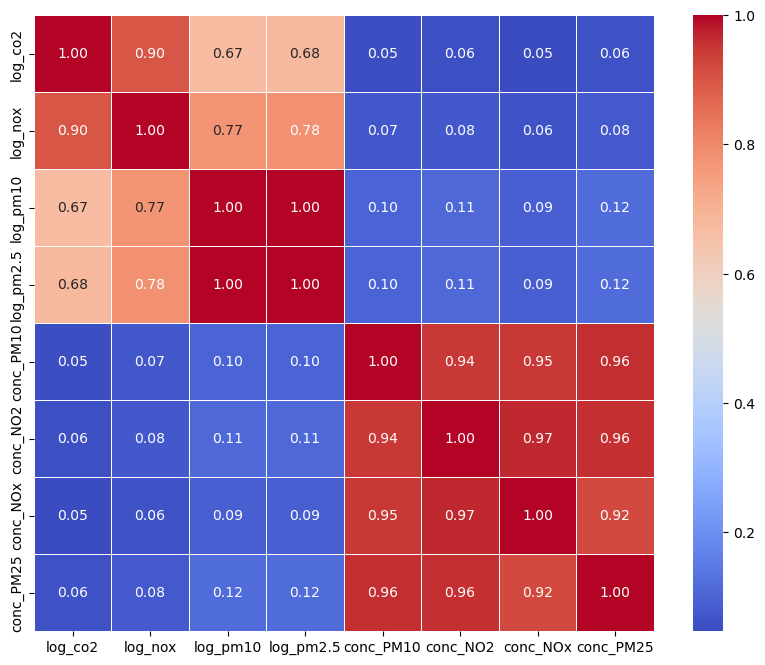

In [48]:
# Heatmap showing correlations between different air pollutants and their concentrations to understand the strength and direction of these relationships

selected_columns = ['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5','conc_PM10', 'conc_NO2', 'conc_NOx', 'conc_PM25']

correlation_matrix = emission_conc_df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

The correlation heatmap shows that concentration measurements of different pollutants are strongly interconnected, while the log-transformed values exhibit distinct correlation patterns among themselves. However, the weak correlations between the log-transformed variables and the concentration measurements suggest that they do not have straightforward linear relationships.

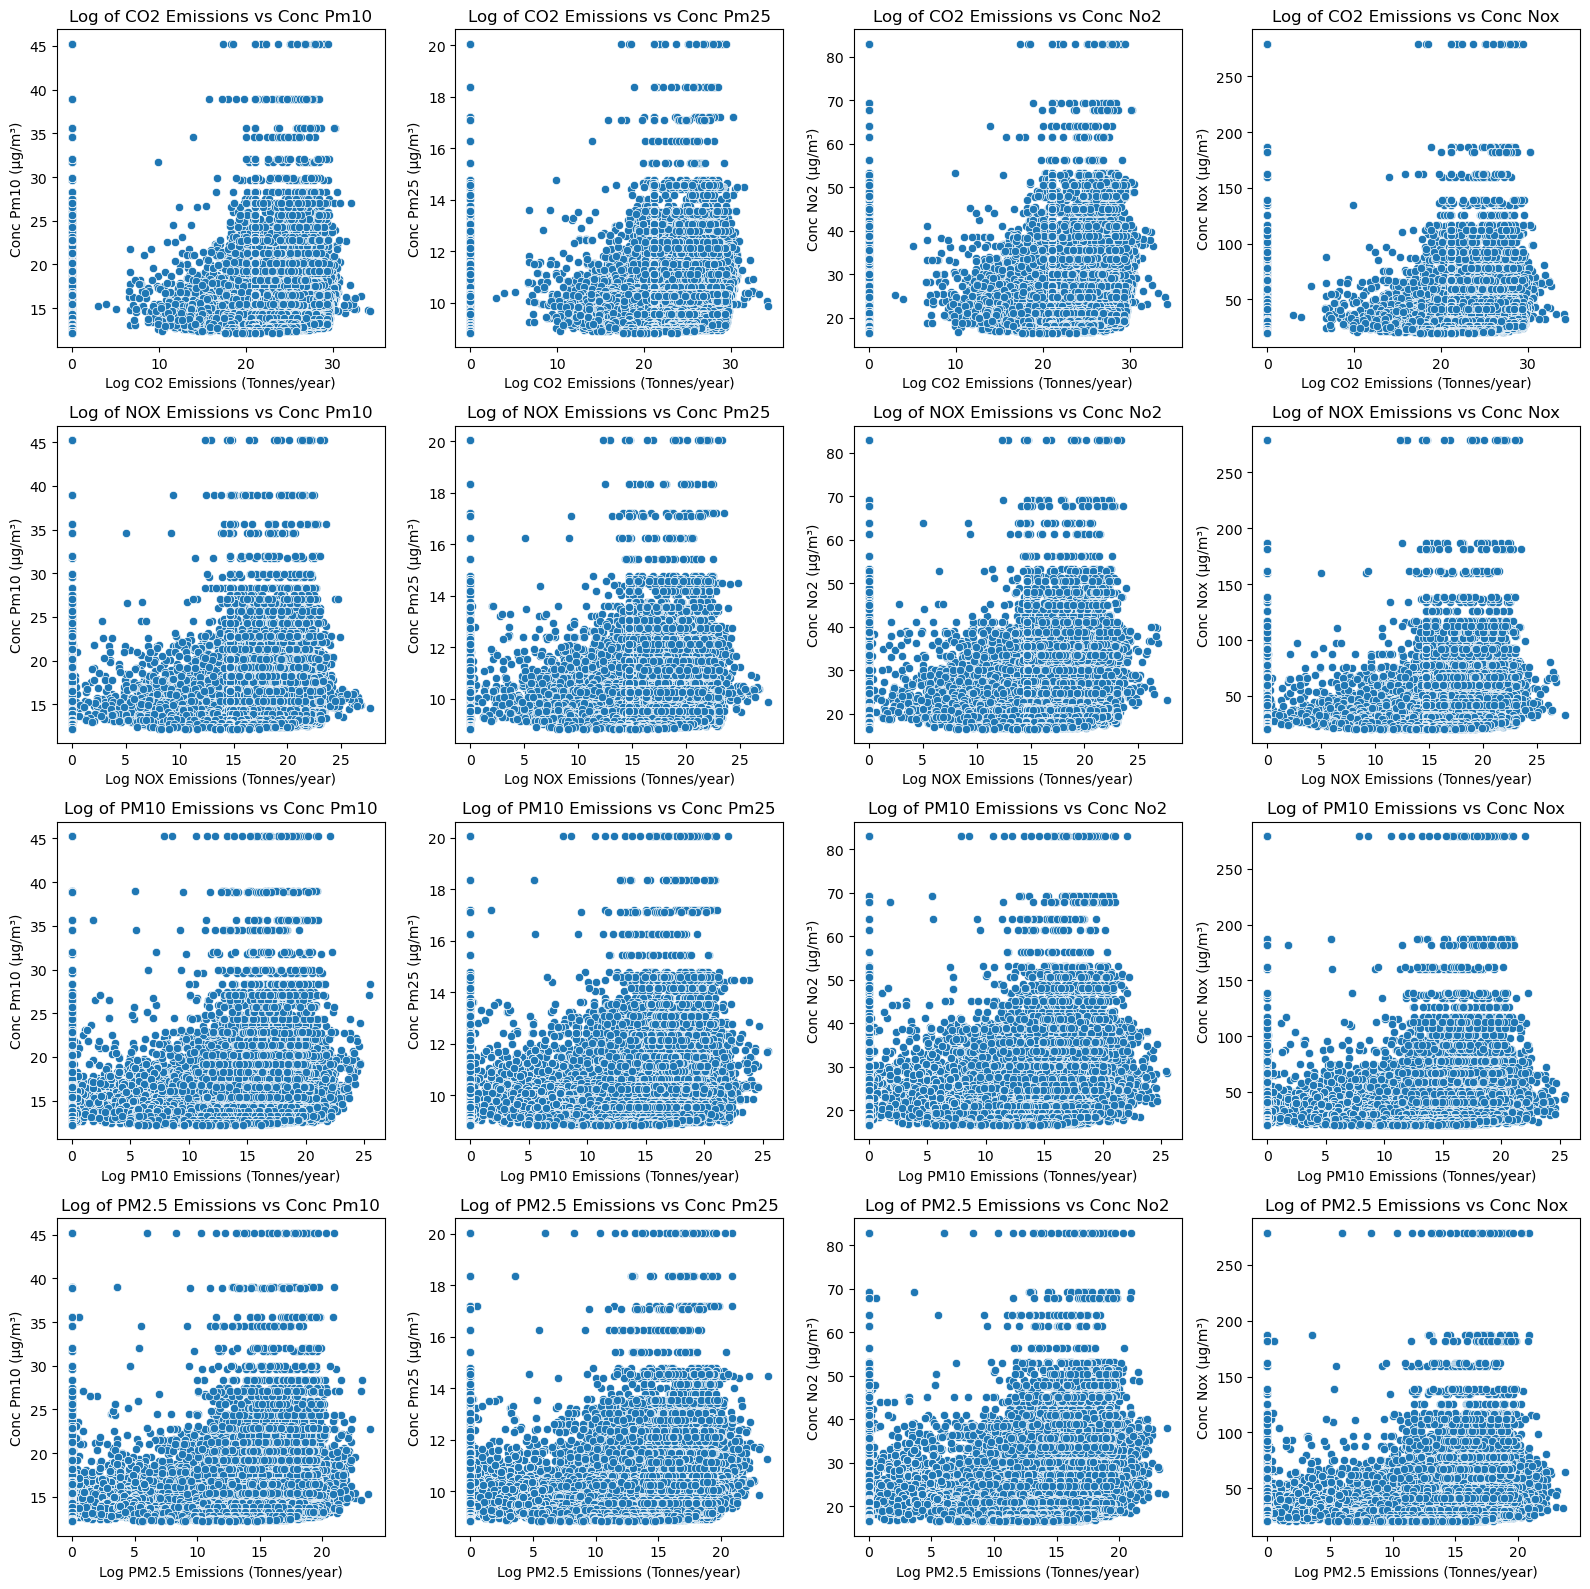

In [49]:
# Scatter plots showing relationships between log-transformed emissions data and pollutant concentration data at various locations.

log_pollutants = ['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5']

concentration_columns = ['conc_PM10', 'conc_PM25', 'conc_NO2', 'conc_NOx']

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, pollutant in enumerate(log_pollutants):
    for j, concentration in enumerate(concentration_columns):
        ax = axes[i, j]  # Use a 4x4 grid, [i, j] selects the correct subplot
        sns.scatterplot(data=emission_conc_df, x=pollutant, y=concentration, ax=ax)
        ax.set_title(f'Log of {pollutant[4:].upper()} Emissions vs {concentration.replace("_", " ").title()}')
        ax.set_xlabel(f'Log {pollutant[4:].upper()} Emissions (Tonnes/year)')
        ax.set_ylabel(f'{concentration.replace("_", " ").title()} (µg/m³)')

plt.tight_layout()
plt.show()

The plots show a generally positive correlation between emissions and concentrations, with higher emissions corresponding to higher pollutant levels. However, the relationships are not perfectly linear, indicating other factors also influence the pollutant concentrations.

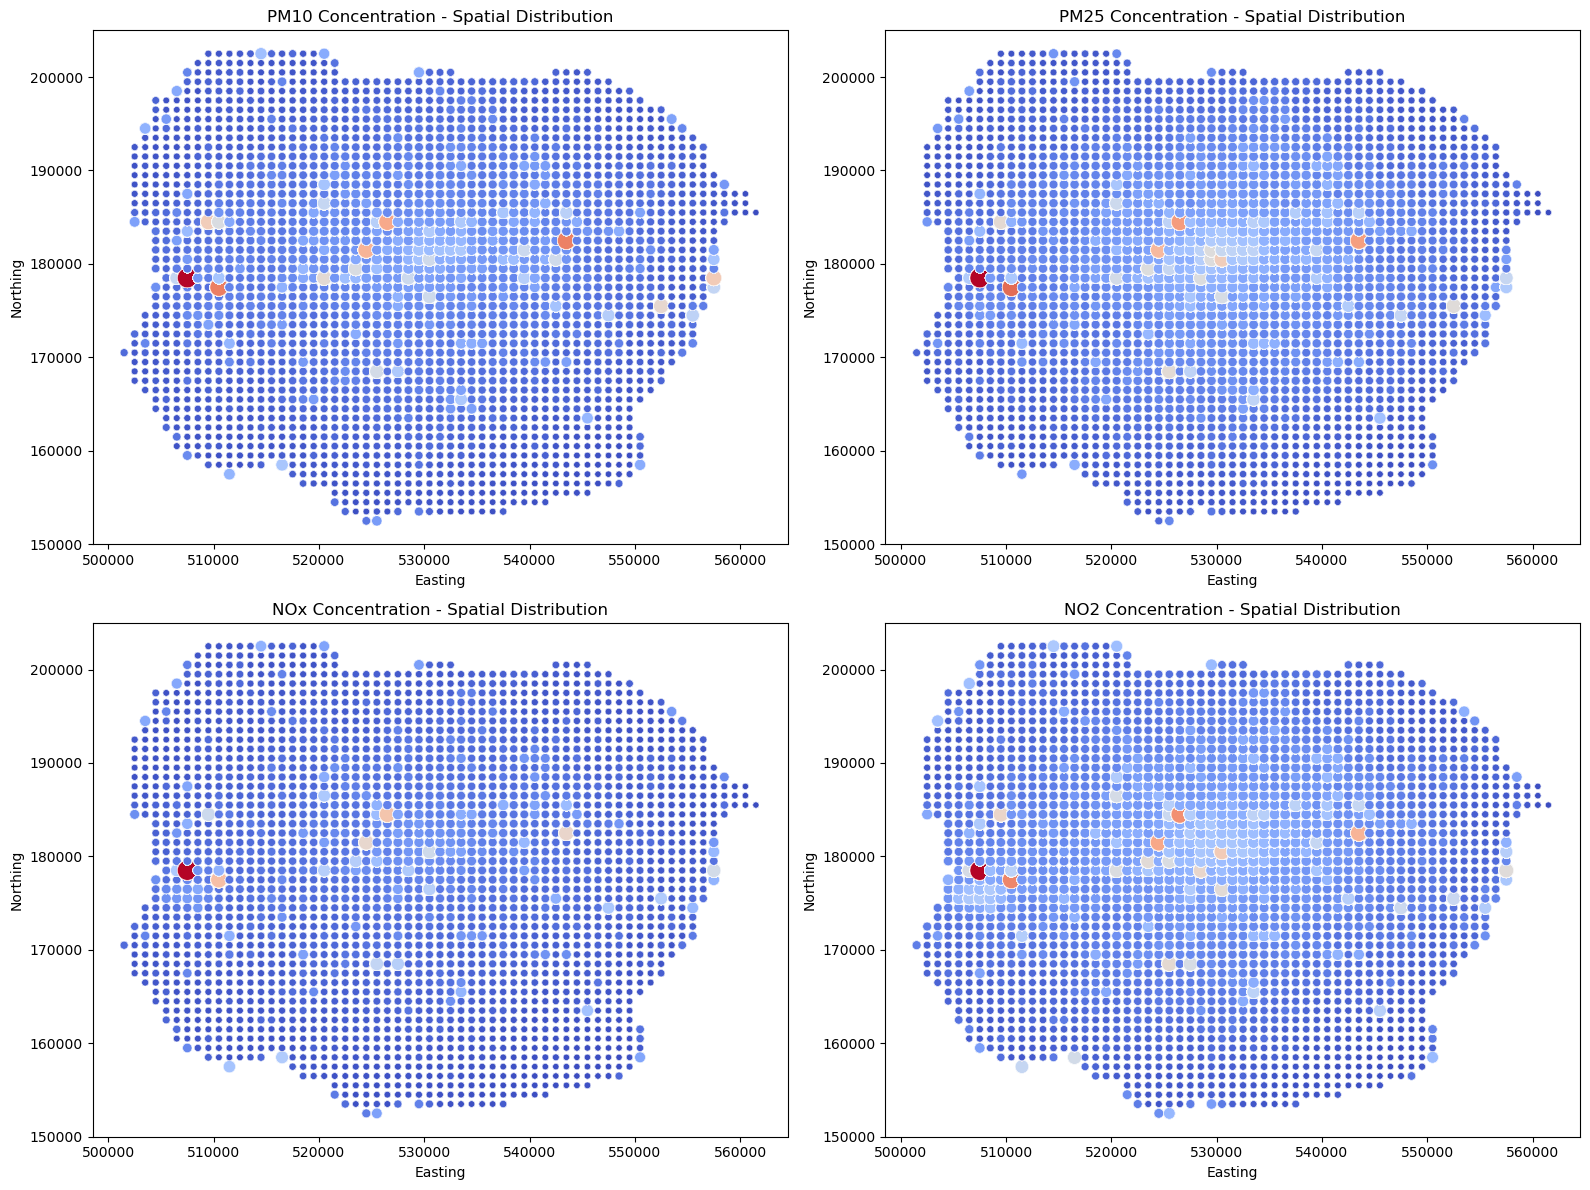

In [50]:
# Scatter plots showing the spatial distribution of pollutant concentrations (PM10, PM2.5, NOx, and NO2) across locations

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

concentration_columns = ['conc_PM10', 'conc_PM25', 'conc_NOx', 'conc_NO2']
titles = ['PM10 Concentration', 'PM25 Concentration', 'NOx Concentration', 'NO2 Concentration']

for i, ax in enumerate(axes.flat):
    sns.scatterplot(data=emission_conc_df, 
                    x='Easting', 
                    y='Northing', 
                    hue=concentration_columns[i],   
                    palette='coolwarm',  
                    size=concentration_columns[i], 
                    sizes=(20, 200),  
                    legend=None,  
                    marker='o', 
                    ax=ax)  
    
    ax.set_title(f'{titles[i]} - Spatial Distribution')
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')

plt.tight_layout()

plt.show()

The spatial distribution visualisation reveals that some pollutants, such as PM10, PM25, and NO2, show more localized hotspots or gradients, while NOx has a more uniform distribution. 

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Multi-Target Prediction**

Let's train three multi-output model that predicts each pollutant's concentration independently

In [52]:
X = emission_conc_df[['log_co2', 'log_nox', 'log_pm10','log_pm2.5', 'Easting', 'Northing', 'Source']]
y = emission_conc_df[['conc_NO2', 'conc_NOx', 'conc_PM10', 'conc_PM25']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
numeric_features = ['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5', 'Easting', 'Northing']
categorical_features = ['Source']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 Random Forest Model

In [55]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=10)))
])

rf_pipeline.fit(X_train, y_train)

y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)


train_mse_rf = mean_squared_error(y_train, y_train_pred_rf, multioutput='raw_values')
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf, multioutput='raw_values')
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf, multioutput='raw_values')
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf, multioutput='raw_values')
train_r2_rf = r2_score(y_train, y_train_pred_rf, multioutput='raw_values')
test_r2_rf = r2_score(y_test, y_test_pred_rf, multioutput='raw_values')

cv_scores_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RandomForest Training MSE:", train_mse_rf)
print("RandomForest Test MSE:", test_mse_rf)
print("RandomForest Training MAE:", train_mae_rf)
print("RandomForest Test MAE:", test_mae_rf)
print("RandomForest Training R²:", train_r2_rf)
print("RandomForest Test R²:", test_r2_rf)
print(f"Cross-validation MSE: {-cv_scores_rf.mean()}")

RandomForest Training MSE: [ 5.60133792 40.69869149  1.61094772  0.1603143 ]
RandomForest Test MSE: [ 5.41734165 39.30417501  1.61743209  0.16157796]
RandomForest Training MAE: [1.03059703 2.82070952 0.51605821 0.16908853]
RandomForest Test MAE: [1.02154137 2.81086065 0.52248833 0.16922632]
RandomForest Training R²: [0.82383151 0.8228159  0.73841598 0.81012676]
RandomForest Test R²: [0.82564547 0.82415625 0.72943145 0.80489987]
Cross-validation MSE: 12.519886951060382


Support Vector Regression (SVR) Model

In [56]:
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('regressor', MultiOutputRegressor(SVR()))
])

svr_pipeline.fit(X_train, y_train)

y_train_pred_svr = svr_pipeline.predict(X_train)
y_test_pred_svr = svr_pipeline.predict(X_test)

train_mse_svr = mean_squared_error(y_train, y_train_pred_svr, multioutput='raw_values')
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr, multioutput='raw_values')
train_mae_svr = mean_absolute_error(y_train, y_train_pred_svr, multioutput='raw_values')
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr, multioutput='raw_values')
train_r2_svr = r2_score(y_train, y_train_pred_svr, multioutput='raw_values')
test_r2_svr = r2_score(y_test, y_test_pred_svr, multioutput='raw_values')

cv_scores_svr = cross_val_score(svr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("SVR Training MSE:", train_mse_svr)
print("SVR Test MSE:", test_mse_svr)
print("SVR Training MAE:", train_mae_svr)
print("SVR Test MAE:", test_mae_svr)
print("SVR Training R²:", train_r2_svr)
print("SVR Test R²:", test_r2_svr)
print(f"Cross-validation MSE: {-cv_scores_svr.mean()}")

SVR Training MSE: [ 15.76192233 167.52266611   3.67422498   0.34157676]
SVR Test MSE: [ 15.42778753 163.10559915   3.56813356   0.34048191]
SVR Training MAE: [1.68776134 4.82047902 0.73855304 0.24440692]
SVR Test MAE: [1.66532334 4.74597086 0.73124015 0.24321702]
SVR Training R²: [0.5042695  0.27068041 0.40338317 0.59544291]
SVR Test R²: [0.50346409 0.27027852 0.40311266 0.58887917]
Cross-validation MSE: 47.09431278327437


Gradient Boosting Model

In [57]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', MultiOutputRegressor(GradientBoostingRegressor(random_state=42)))
])

gb_pipeline.fit(X_train, y_train)

y_train_pred_gb = gb_pipeline.predict(X_train)
y_test_pred_gb = gb_pipeline.predict(X_test)

train_mse_gb = mean_squared_error(y_train, y_train_pred_gb, multioutput='raw_values')
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb, multioutput='raw_values')
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb, multioutput='raw_values')
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb, multioutput='raw_values')
train_r2_gb = r2_score(y_train, y_train_pred_gb, multioutput='raw_values')
test_r2_gb = r2_score(y_test, y_test_pred_gb, multioutput='raw_values')

cv_scores_gb = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("GradientBoosting Training MSE:", train_mse_gb)
print("GradientBoosting Test MSE:", test_mse_gb)
print("GradientBoosting Training MAE:", train_mae_gb)
print("GradientBoosting Test MAE:", test_mae_gb)
print("GradientBoosting Training R²:", train_r2_gb)
print("GradientBoosting Test R²:", test_r2_gb)
print(f"Cross-validation MSE: {-cv_scores_gb.mean()}")

GradientBoosting Training MSE: [ 10.77585196 116.46626204   2.63936245   0.27017777]
GradientBoosting Test MSE: [ 10.81509076 117.86677544   2.63554679   0.27483571]
GradientBoosting Training MAE: [1.70608522 5.00495315 0.76897096 0.2556646 ]
GradientBoosting Test MAE: [1.70132205 4.98705875 0.76858032 0.25652646]
GradientBoosting Training R²: [0.66108712 0.49295741 0.57142307 0.68000653]
GradientBoosting Test R²: [0.65192151 0.47267342 0.55911838 0.66814482]
Cross-validation MSE: 32.83389246875123
